In [1]:
# Import Necessary Programs to Run Clean Code

import pandas as pd
import numpy as np

In [2]:
# Load CSV File

df_clean = pd.read_csv(f'D:\Promi\Project1_Group5_DataBootCamp\Data_Exploration_Dataset\ontario_property_data_2010_2023.csv')

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nafis\AppData\Local\Temp\ipykernel_12280\1254436004.py:3: SyntaxWarning: invalid escape sequence '\P'
  df_clean = pd.read_csv(f'D:\Promi\Project1_Group5_DataBootCamp\Data_Exploration_Dataset\ontario_property_data_2010_2023.csv')


In [3]:
# Basic cleaning steps:
# 1. Handle missing values (if any)
# 2. Ensure numeric fields are of correct data type
# 3. Remove any rows with unrealistic values
# 4. Deal with outliers in pricing, square footage, etc.

In [4]:
# Check for missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

Missing values before cleaning:
Year                    0
Region/City             0
Number of Bedrooms      0
Number of Bathrooms     0
Square Footage          0
Listing Price           0
Sale Price              0
Days on Market          0
Property Age (Years)    0
Property Type           0
Number of Garages       0
dtype: int64


In [5]:
# Replace negative square footage or prices with NaN (unrealistic values)
df_clean['Square Footage'] = df_clean['Square Footage'].apply(lambda x: np.nan if x <= 0 else x)
df_clean['Listing Price'] = df_clean['Listing Price'].apply(lambda x: np.nan if x <= 0 else x)
df_clean['Sale Price'] = df_clean['Sale Price'].apply(lambda x: np.nan if x <= 0 else x)

In [6]:
# Drop rows with missing or NaN values
df_clean.dropna(inplace=True)

In [7]:
# Convert numeric fields to appropriate types
df_clean['Square Footage'] = df_clean['Square Footage'].astype(int)
df_clean['Listing Price'] = df_clean['Listing Price'].astype(int)
df_clean['Sale Price'] = df_clean['Sale Price'].astype(int)
df_clean['Days on Market'] = df_clean['Days on Market'].astype(int)

In [8]:
# Remove outliers using interquartile range (IQR) method for pricing and square footage
Q1 = df_clean[['Square Footage', 'Listing Price', 'Sale Price']].quantile(0.25)
Q3 = df_clean[['Square Footage', 'Listing Price', 'Sale Price']].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Define acceptable range for outliers
df_clean = df_clean[~((df_clean[['Square Footage', 'Listing Price', 'Sale Price']] < (Q1 - 1.5 * IQR)) | 
                      (df_clean[['Square Footage', 'Listing Price', 'Sale Price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
# Save the cleaned data back to a new CSV file
df_clean.to_csv('cleaned_ontario_property_data.csv', index=False)

In [21]:
# Import Necessary Programs to Run Analysis/Graphs Code
import matplotlib.pyplot as plt
import seaborn as sns

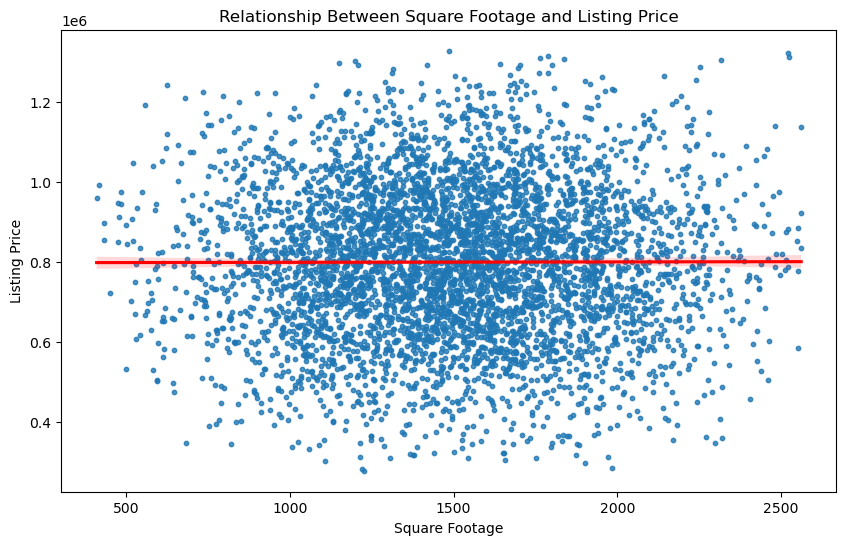

In [26]:
# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Square Footage', y='Listing Price', data=df_clean, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Relationship Between Square Footage and Listing Price')
plt.xlabel('Square Footage')
plt.ylabel('Listing Price')
plt.show()

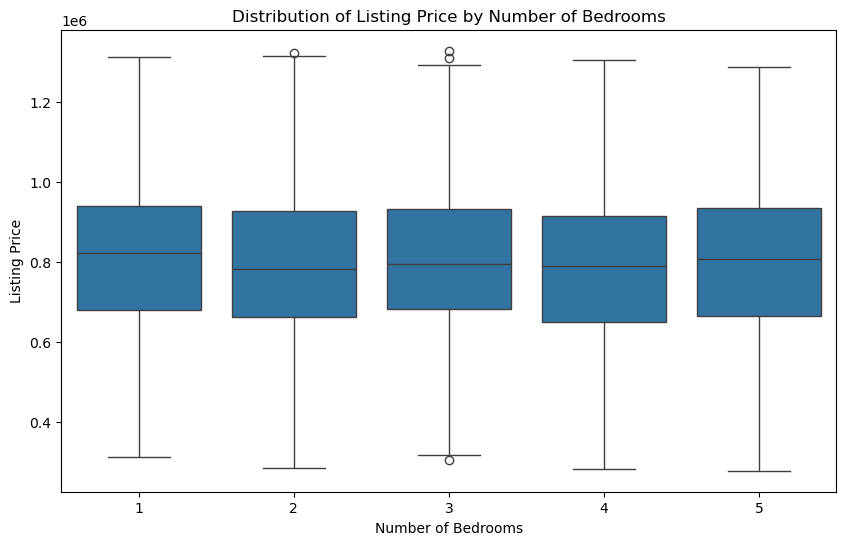

In [14]:
# Box plot with regression line
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Bedrooms', y='Listing Price', data=df_clean)
plt.title('Distribution of Listing Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Listing Price')
plt.show()